<a href="https://colab.research.google.com/github/alx1056/Fed-Funds-Regression/blob/main/Econ_Fed_Funds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is analysis is to take a look into how CPI, Import/Exports and the Unemployment rate affects the FED FUNDS rate. This data is an aggregate from each afformentioned feature pulled from https://www.bls.gov/. 

I will be running a linear regression analysis to determine this information. 

In [4]:
import pandas as pd 
import numpy as np
import seaborn as sns
import missingno as mn
import matplotlib.pyplot as plt

In [5]:
data = pd.read_excel("/content/Book1.xlsx", index_col="Year")
data.head()

,Period,CPI Index,Value,Import/Export index,FEDFUNDS
Year,,,,,
1997,M02,159.6,5.6,98.7,5.53
1997,M03,160.0,5.4,99.4,5.92
1997,M04,160.2,5.4,99.9,5.98
1997,M05,160.1,5.8,100.9,6.05
1997,M06,160.3,5.6,101.8,6.01


In [6]:
data.rename(columns={'Value': 'Unemployment'}, inplace=True)

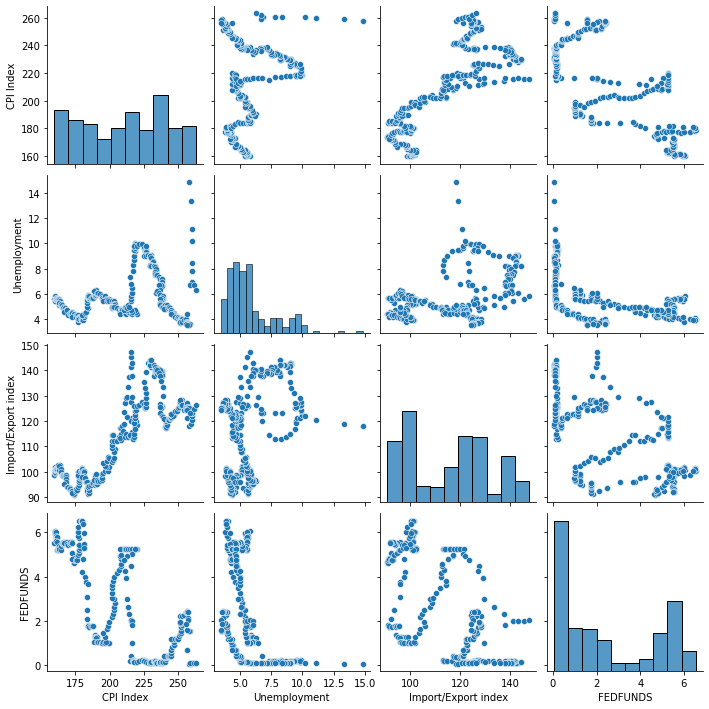

In [7]:
sns.pairplot(data=data)

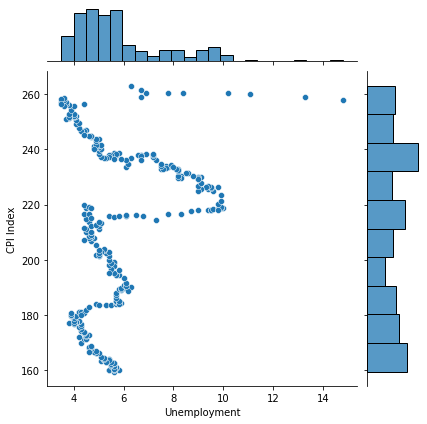

In [41]:
#sns.scatterplot(data=data, x="Unemployment in thousands", y="CPI Index", palette="Year")
sns.jointplot(data=data, x="Unemployment", y="CPI Index")

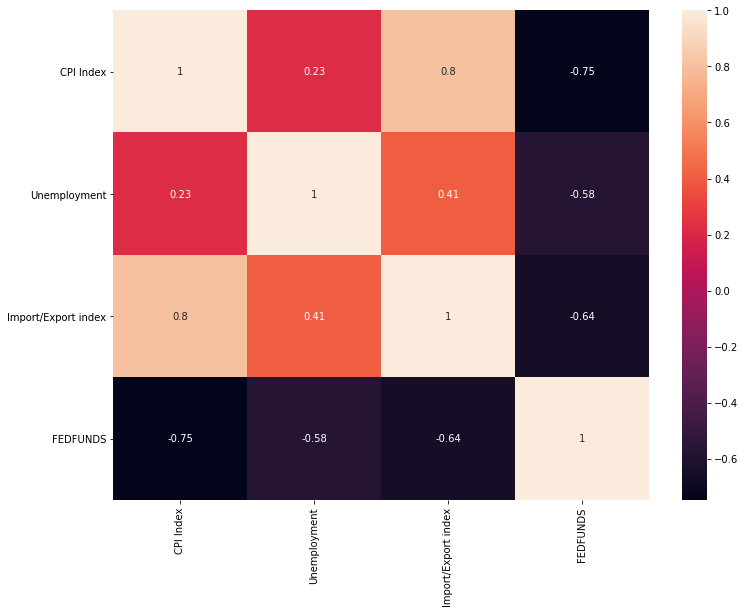

In [9]:
corrMatrix = data.corr()
sns.heatmap(corrMatrix, annot=True)
fig = plt.gcf()
fig.set_size_inches(12, 9)
plt.show()

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 313 entries, 1997 to 2021
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Period               313 non-null    object 
 1   CPI Index            313 non-null    float64
 2   Unemployment         313 non-null    float64
 3   Import/Export index  313 non-null    float64
 4   FEDFUNDS             313 non-null    float64
dtypes: float64(4), object(1)
memory usage: 14.7+ KB


In [10]:
data.describe()

,CPI Index,Unemployment,Import/Export index,FEDFUNDS
count,313.000000,313.000000,313.000000,313.000000
mean,211.167968,5.785942,115.575080,2.414760
std,30.695081,1.841455,16.152934,2.242357
min,159.600000,3.500000,91.000000,0.050000
25%,183.100000,4.500000,100.000000,0.160000
50%,215.693000,5.300000,118.200000,1.730000
75%,237.111000,6.200000,126.500000,5.070000
max,263.014000,14.800000,147.500000,6.540000


In [11]:
features = pd.DataFrame(data=data, columns=['CPI Index', 'Import/Export index', 'Unemployment'])

In [12]:
from sklearn.model_selection import train_test_split

X = features
y = data['FEDFUNDS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 101)

In [13]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

In [38]:
print("each additional cpi index 1 point increase, there will be a " + str(round(lm.coef_[0], ndigits=5)) + " increase in the Fed Funds rate")
print("\n")
print("each additional import/export 1 point increase, there will be a " + str(round(lm.coef_[1], ndigits=5)) + " increase in the Fed Funds rate")
print("\n")
print("each additional unemployment percentage point increase, there will be a " + str(round(lm.coef_[2], ndigits=5)) + " increase in the Fed Funds rate")
print("\n")
print("This shows that as CPI and Unemployment increase the Fed lowers rates and with an increase in our import/exports we see the Fed raise rates.")

each additional cpi index 1 point increase, there will be a -0.05938 increase in the Fed Funds rate


each additional import/export 1 point increase, there will be a 0.03158 increase in the Fed Funds rate


each additional unemployment percentage point increase, there will be a -0.60541 increase in the Fed Funds rate


This shows that as CPI and Unemployment increase the Fed lowers rates and with an increase in our import/exports we see the Fed raise rates.


In [45]:
def predict_rates():
  cpi = input("Please enter cpi index #: ")
  imports = input("Please enter the import/export index #: ")
  unemploy = input("Please enter the unemployment rate #: ")
  cpi = int(cpi)
  imports = int(imports)
  unemploy = int(unemploy)

  return print(str(int(lm.predict([[cpi, imports, unemploy]]))) + " % is the predicted Fed Funds rate")

predict_rates()

Please enter cpi index #: 77
Please enter the import/export index #: 89
Please enter the unemployment rate #: 2
11 % is the predicted Fed Funds rate


In [53]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
r2 = r2_score(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)

print("the R^2 value of this analysis is: " + str(r2))
print("\n")
print("the Mean Squared Error of this analysis is: " + str(mse))
print("\n")
print("The Mean Absolute Error for this analysis: " + str(mae))

the R^2 value of this analysis is: 0.7277271535786307


the Mean Squared Error of this analysis is: 1.340710111932188


The Mean Absolute Error for this analysis: 0.8886850386633353
